## 캘리포니아 주택 가격 예측

In [161]:
import sklearn

In [162]:
sklearn.__version__

'0.24.1'

## 데이터 가져오기

In [1]:
import pandas as pd
housing = pd.read_csv('datasets/housing.csv')

## 데이터 훑어보기

In [2]:
housing.head() #위도 경도가 있으면 scatter을 그리기 좋다. 지역 만들기 가능

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


longitude : 경도

latitude : 위도

housing_median_age : 구역단위의 평균 년식

total_rooms : 총 방의 개수 (평균아님 sum)

total_bedrooms : 총 침실의 개수

population : 구역의 총 인구수

households : 구역의 총 가구수

median_income : 구역 별 소득 중앙값 단위는 10000이다.

median_house_value : 나눈 구역의 주택 가격 중앙값

ocean_proximity : 바다 근접도

In [3]:
 housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].head(10)

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
5    NEAR BAY
6    NEAR BAY
7    NEAR BAY
8    NEAR BAY
9    NEAR BAY
Name: ocean_proximity, dtype: object

In [6]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing.isnull().sum() # bedrooms 널값 확인. 채워줘야함. info에서도 확인 가능함.

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

housing.fillna(0, inplace=True)
housing.isnull().sum()

In [9]:
import matplotlib.pyplot as plt

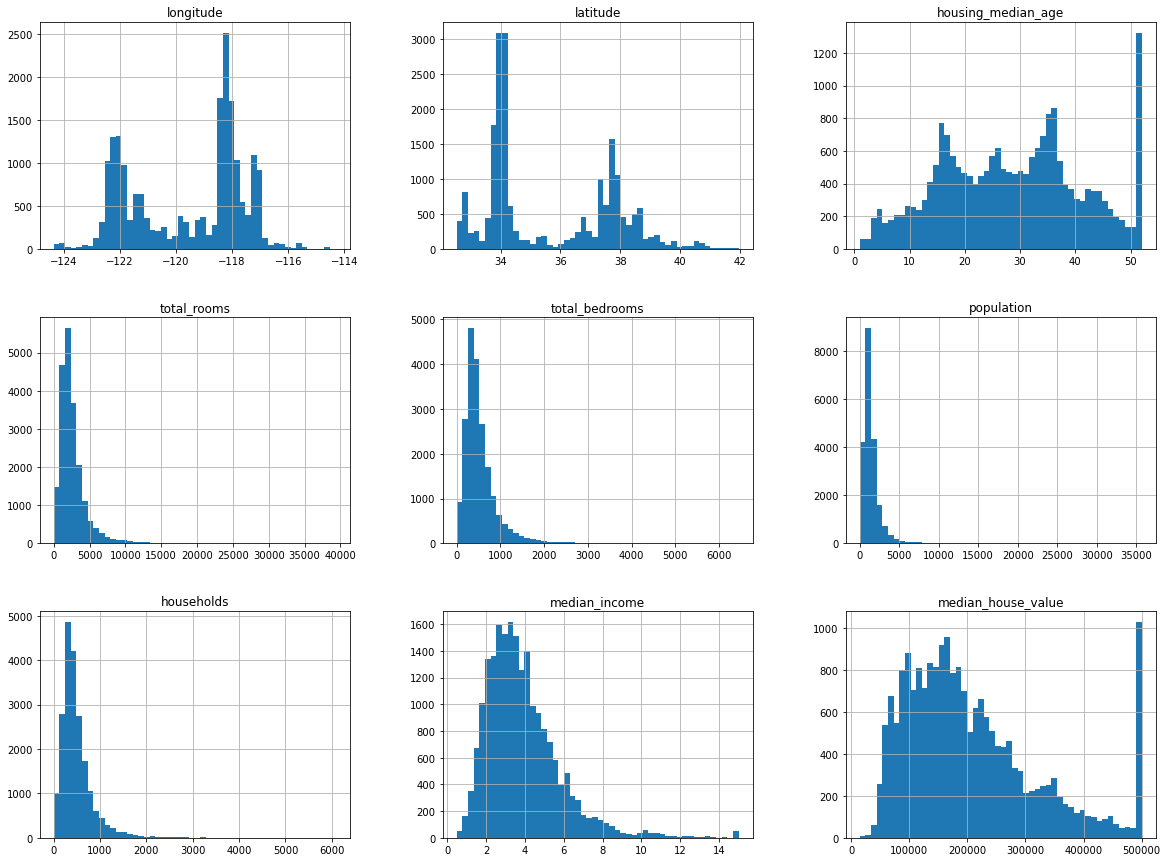

In [10]:
housing.hist(bins=50, figsize=(20, 15)) #중간중간 오차값 큰것들이 많다. 

#housing_median_age와 
#housing_median_value의 경우 50년 넘는 것을 51년으로 가공했을 가능성이 크다.
plt.show()

In [11]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

## 테스트 세트 분리

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_set, test_set = train_test_split(housing, test_size=0.2,random_state=42)

In [14]:
test_set.head() #섞여 있어야 하기에 random_state를 설정함.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

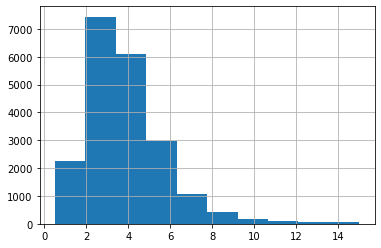

In [15]:
 housing.median_income.hist()

In [16]:
import numpy as np
housing['income_cat'] = pd.cut(housing.median_income, bins=[0. , 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [17]:
housing['income_cat'].value_counts() # 3.0 ~ 4.5가 가장 많다.

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

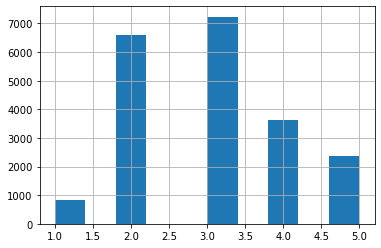

In [18]:
housing['income_cat'].hist()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [21]:
for train_index, test_index in split.split(housing, housing['income_cat']): #income_cat의 비율을 반영한 것이다. 
    print(train_index)
    print(test_index)

[17606 18632 14650 ... 13908 11159 15775]
[ 5241 10970 20351 ...  4019 12107  2398]


In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']): #income_cat의 비율을 반영한 것이다. 
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index] 

In [23]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


In [24]:
strat_train_set['income_cat'].value_counts()

3    5789
2    5265
4    2911
5    1889
1     658
Name: income_cat, dtype: int64

## 1) 계층 정보(median_income)가 반영되어 샘플링된 테스트 데이터
테스트 만으로 전체를 잘 표현할 수 있다는 것을 알려준다.
기본 split말고 strat를 쓰는 것이 계층 정보도 반영되기에 좋다.

In [25]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [26]:
housing.income_cat.value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

## 2)  무작위 추출된 테스트 데이터

In [27]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.income_cat.value_counts() / len(test_set) #세가지 데이터에 대해 비율이 차이를 보인다.

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

* 계층별 샘플링 (또다른 방법)

In [28]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify = housing['income_cat'])

In [29]:
test_set['income_cat'].value_counts() / len(test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729 이를 통해서 알 수 있는 것은 기본 split에서도 stratify를 활용하면 충분히 계층 정보를 담아서 똑같은 결과가 나온다.

In [30]:
strat_train_set.drop('income_cat', axis=1, inplace=True)

In [31]:
strat_test_set.drop('income_cat', axis=1, inplace=True)

In [32]:
strat_train_set.head() #income_cat 열이 사라진 것을 볼 수 있음

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


## 지리적 데이터 시각화

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

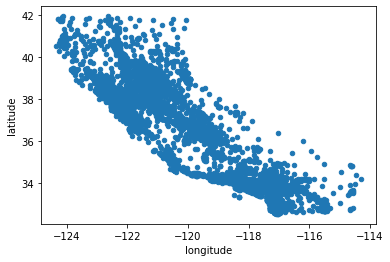

In [33]:
housing.plot(kind='scatter', x='longitude', y='latitude') # 캘리포니아 주의 모양과 비슷하다

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

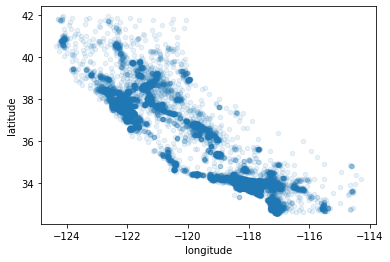

In [34]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

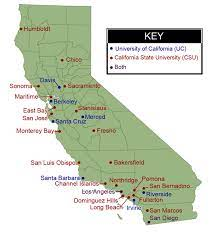

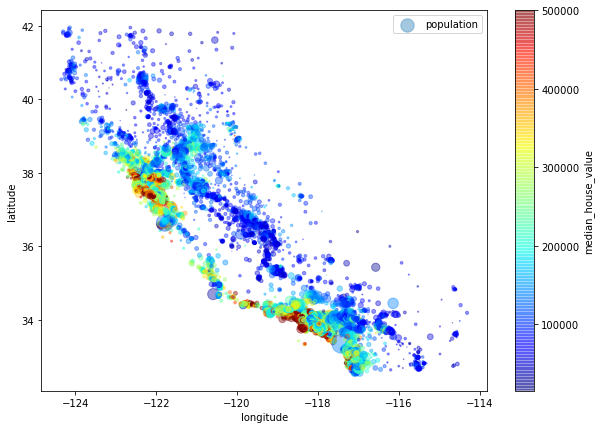

In [35]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label = 'population', figsize=(10, 7),
            c = 'median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
            sharex=False)
plt.legend()

* 붉을 수록 가격은 비싸다. 사이즈가 클수록 인구수가 많다.

* 해안가의 가격이 비싼 것을 볼 수 있다. (아래쪽 해안가는 LA다)
* 해안가처럼 밀집된 곳일수록 가격이 비싸다. 

## 상관관계 조사

In [36]:
corr_matrix = housing.corr() #-1부터 1사이의 값이다. 양일수록 서로 영향이 있다는 뜻
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [37]:
corr_matrix['median_house_value'].sort_values(ascending=False) #ascending이 무분별하게 되있던걸 False로 바꾸므로 정렬하겠다는 말.

# 순서대로 소득, 방의 개수 정도와 상관관게가 있다.

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

피어슨의 상관 계수(위키백과)

![Pearson correlation coefficient](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

In [38]:
#선형적일 수록 관계가 있거나 없거나 이다 아무리 모양이 있더라도 선형이 아니면 관계 x

In [39]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='households', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='households', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='households', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='median_income', ylabel='households'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='households'>,
        <Axes

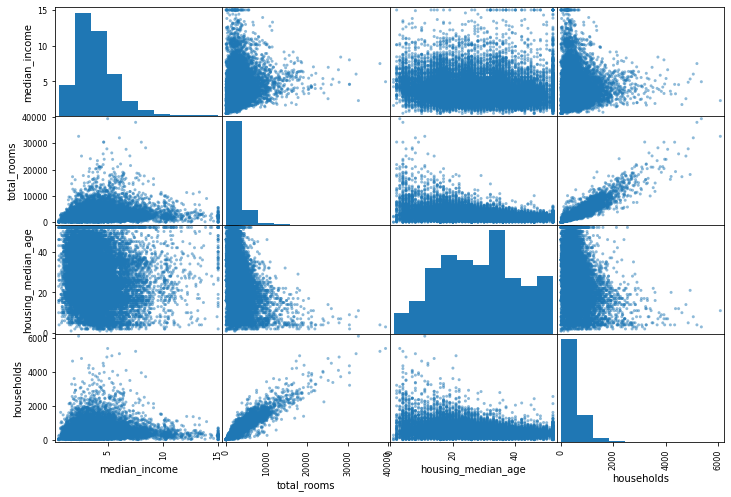

In [40]:
attributes = ['median_income','total_rooms', 'housing_median_age', 'households']
scatter_matrix(housing[attributes], figsize=(12, 8))
#대각 선은 안봐도 된다.

가구수와 방의 개수의 상관관계가 뚜렸하다

array([[<AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', yla

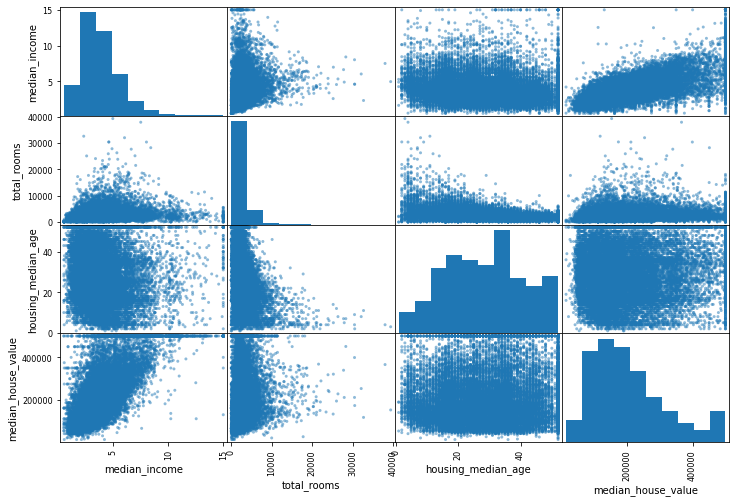

In [41]:
attributes = ['median_income','total_rooms', 'housing_median_age', 'median_house_value']
scatter_matrix(housing[attributes], figsize=(12, 8))
#대각 선은 안봐도 된다.

(0.0, 16.0, 0.0, 550000.0)

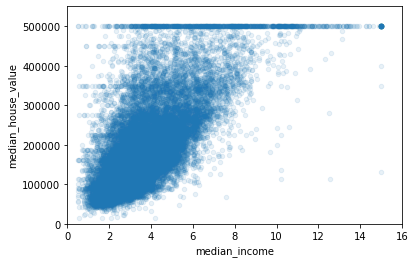

In [42]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha = 0.1)
plt.axis([0, 16,0, 550000])

소득과 집의 가치에 대해 확실히 상관관계가 있다.

550000와 16으로 묶어서 선하나가 보일 수 밖에 없다

## 특성 조합으로 실험

In [43]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


housing['households'] 로 나눔으로써 가구수의방의 개수 등등을 알 수 있다.

### 아래와 같은 것이 차원축소이나 특성추출로 볼 수도 있다. 새로운 특성을 만든다.

In [44]:
housing['room_per_household'] = housing['total_rooms'] / housing['households'] #가구당 방이 많을 수록 비싼 집일 수도 있다.

housing['bedroom_per_room'] = housing['total_bedrooms'] / housing['total_rooms'] #해당 비율이 높다는 것은 화장실, 다용도실 등의 개수가 적은 것이므로 기본적인 집일 가능성이 크다

housing['population_per_household'] = housing['population'] / housing['households'] #가구당 몇명 사는지 알 수 있다. 방은 많은데 사람이 적으면 더 비쌀 가능성 크다.

In [47]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,room_per_household,bedroom_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467


In [48]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
room_per_household          0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroom_per_room           -0.255880
Name: median_house_value, dtype: float64

바꾼 것들이 조금더 양의 값이나 음의 값을 나타내고 있다. 음수인 경우 반비례다.

In [49]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20640 non-null  float64 
 1   latitude                  20640 non-null  float64 
 2   housing_median_age        20640 non-null  float64 
 3   total_rooms               20640 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20640 non-null  float64 
 6   households                20640 non-null  float64 
 7   median_income             20640 non-null  float64 
 8   median_house_value        20640 non-null  float64 
 9   ocean_proximity           20640 non-null  object  
 10  income_cat                20640 non-null  category
 11  room_per_household        20640 non-null  float64 
 12  bedroom_per_room          20433 non-null  float64 
 13  population_per_household  20640 non-null  floa

특성은 housing
레이블은 housing_label

In [50]:
strat_test_set.size

41280

In [51]:
strat_train_set.size

165120

In [52]:
strat_test_set.shape

(4128, 10)

In [53]:
strat_train_set.shape

(16512, 10)

## 데이터 전처리

In [54]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_label = strat_train_set.median_house_value.copy()

In [55]:
housing.head() #label인 값이 빠짐.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [56]:
housing.shape

(16512, 9)

In [57]:
housing_label.shape #정답값만 들어있는 1차원이다.

(16512,)

In [58]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [59]:
housing.isnull().any(axis=1) #열을 기준으로 가져와서 하나라도 있으면 인데 시리즈라는 것은 하나의 열만 널값을 보유하고 해당 열을 다 가져오지만
# null이면 True 그렇지 않으면 False를 가진다.

17606    False
18632    False
14650    False
3230     False
3555     False
         ...  
6563     False
12053    False
13908    False
11159    False
15775    False
Length: 16512, dtype: bool

In [60]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head() #침실이 없는 것들을 받아온다.

In [61]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [62]:
#option1 (샘플 삭제)

In [63]:
sample_incomplete_rows.dropna(subset=['total_bedrooms'], axis=0) #다삭제가 되어서 안보이는 것 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [64]:
#option2 (특성 삭제)

In [65]:
sample_incomplete_rows.drop('total_bedrooms', axis= 1) #특성 자체를 삭제해버리는 것.

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [66]:
#option3 (특성 채우기)

In [67]:
median = housing['total_bedrooms'].median()
median

433.0

In [68]:
sample_incomplete_rows['total_bedrooms'].fillna(median, inplace=True)

In [69]:
sample_incomplete_rows #이렇게 중간 값 넣어주는 것도 가능. 이걸 sklearn에서 처리할 수 도 있다.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [70]:
from sklearn.impute import SimpleImputer

In [71]:
imputer = SimpleImputer(strategy='median') #폼을 바꾸는 애라는 말이다. 사이킷런에서 값을 변환하는 추정기이다.

### 여기서는 붓꽃 데이터와 달리 분류기가 아닌 전처리를 하는 변환기로 사용된다. imputer에 뭐가 들어가냐가 중요.

imputer.fit /  골격을 맞춰주는 역할

imputer.transform / 데이터 변경

### 붓꽃데이터
knn.fit /학습

knn.predict /예측

In [72]:
housing_num = housing.drop('ocean_proximity', axis=1) #해당 데이터는 오브젝트형태라 중간값을 구할 수가 없다.

In [73]:
housing_num 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [74]:
imputer.fit(housing_num) #모든 열에 대해 중간값만 꺼내준다. 변환기로서의 fit이 그런 의미이다.

SimpleImputer(strategy='median')

In [75]:
imputer.statistics_ #fit 만으로는 변환은 아니고 변환에 필요한 값을 만들고 transform으로 변환한다.

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [76]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [77]:
housing_num.median() #파이썬 산술통계함수다 사이킷런 아니다.

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

In [78]:
X = imputer.transform(housing_num) #넘파이로 배출해서 df로 따로 만들어야한다.

In [79]:
X #결측치를 알아서 찾고 그에 대해서 중간값을 일괄적용한다.

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [80]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [81]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [82]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index) #인덱스도 기존의정렬된 인덱스가 아닌 housing_num 의 인덱스를 받아와야함.

In [83]:
sample_incomplete_rows.index

Int64Index([4629, 6068, 17923, 13656, 19252], dtype='int64')

In [84]:
housing_tr.loc[sample_incomplete_rows.index] #중간 값으로 변환된 것을 볼 수 있다.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [85]:
imputer.strategy #전략은 중간값으로 두었다.

'median'

## 데이터 인코딩

In [87]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [94]:
housing_cat = housing[['ocean_proximity']]

In [97]:
housing_cat[:10]

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


### OrdinalEncoder

In [89]:
from sklearn.preprocessing import OrdinalEncoder #레이블 인코딩으로 숫자값으로 변환해준다.

In [90]:
ordinal_encoder = OrdinalEncoder() #변환기 중 한 모델.

In [99]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat) #0은 1시간내 바다,  1은 대륙  2는 섬 3은 만 근처, 4는 바다 근처이다.
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [100]:
ordinal_encoder.categories_ #각각이 0 1 2 3 4이다.

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### OneHotEncoder

In [101]:
from sklearn.preprocessing import OneHotEncoder

In [102]:
cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot #데이터가 보이지 않는다. 그 이유는 1이 몇개 없는 데이터 프레임은 일부러 안보여준다. 이것이 sparse matrix

In [107]:
housing_cat_1hot.toarray() #배열로 보니까 보인다. 줄마다 1이 한개씩 있으며 dummy와 같은 형태.

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [108]:
cat_encoder.categories_ #이거 하나하나가 columns으로 매핑이 됐다.

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

* 참고

In [109]:
pd.factorize(housing.ocean_proximity) #Ordinal Encoder 하고 같은 것. 레이블을 수로 인코딩 해준다. 하나의 컬럼을 유지하고 object를 int형으로 순서별로 부여한다.

(array([0, 0, 1, ..., 2, 0, 3], dtype=int64),
 Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object'))

In [111]:
pd.get_dummies(housing.ocean_proximity) #OneHot Encoder하고 같음. 각각 컬럼으로 만들고 0또는 1

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,1,0,0,0,0
18632,1,0,0,0,0
14650,0,0,0,0,1
3230,0,1,0,0,0
3555,1,0,0,0,0
...,...,...,...,...,...
6563,0,1,0,0,0
12053,0,1,0,0,0
13908,0,1,0,0,0
11159,1,0,0,0,0


## 데이터 전처리 preprocessing 안의 있는 모듈들

In [ ]:
SimpleImputer, MinMaxScaler, StandardScaler, ordinal_encoder, OneHotEncoder

In [ ]:
fit, transform

## 나만의 변환기 만들기

In [ ]:
np_c는 컬럼끼리 (열) 병합 np_r은 로우끼리 병합 (행)

In [112]:
from sklearn.base import BaseEstimator, TransformerMixin

In [114]:
# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


In [115]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [116]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [120]:
housing_extra_attribs[0]

array([-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
       '<1H OCEAN', 4.625368731563422, 2.094395280235988], dtype=object)

In [126]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'room_per_household', 'bedroom_per_room',
       'population_per_household'],
      dtype='object')

In [122]:
housing['room_per_household'] = housing['total_rooms'] / housing['households']
housing['bedroom_per_room'] = housing['total_bedrooms'] / housing['total_rooms'] 
housing['population_per_household'] = housing['population'] / housing['households']

In [127]:
pd.DataFrame(housing_extra_attribs, columns=list(housing.columns) + ['rooms_per_household','population_per_household'])

AssertionError: Number of manager items must equal union of block items
# manager items: 12, # tot_items: 11

## 파이프라인은 클래스, 함수와 같이 전처리에 필요한 함수들을 모아 클래스화 한 것과 같다

In [128]:
#수치형 특성 전처리 1
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        #('attribs_adder', CombinedAttributesAdder()),
        #('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [131]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,room_per_household,bedroom_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,6.052381,0.185681,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,4.635659,0.245819,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,6.346405,0.179609,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,5.505618,0.193878,3.808989


In [132]:
housing.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              158
population                    0
households                    0
median_income                 0
ocean_proximity               0
room_per_household            0
bedroom_per_room            158
population_per_household      0
dtype: int64

In [135]:
housing_num_tr.shape

(16512, 8)

In [139]:
col = housing.columns

In [141]:
col = col[:-3]

In [142]:
col

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [143]:
pd.DataFrame(housing_num_tr, columns=col).isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [144]:
#수치형 특성 전처리 2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        #('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [146]:
housing_num_tr.shape

(16512, 11)

In [147]:
housing_num_tr[0]

array([-1.21890000e+02,  3.72900000e+01,  3.80000000e+01,  1.56800000e+03,
        3.51000000e+02,  7.10000000e+02,  3.39000000e+02,  2.70420000e+00,
        4.62536873e+00,  2.09439528e+00,  2.23852041e-01])

In [148]:
-1.21890000e+02,

(-121.89,)

In [149]:
#수치형 특성 전처리 3 모두.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num) #모든 전처리를 한 부분이다.

In [151]:
housing_num_tr.mean() # 평균은 0에 수렴

-1.9225479402820057e-16

In [152]:
housing_num_tr.std() #표준 편차는 1에 수렴.

0.9999999999999999

In [156]:
g = pd.DataFrame(housing_num_tr, columns=list(housing.columns[:-1]) + ['rooms_per_household','population_per_household','bedrooms_per_room'])

<AxesSubplot:>

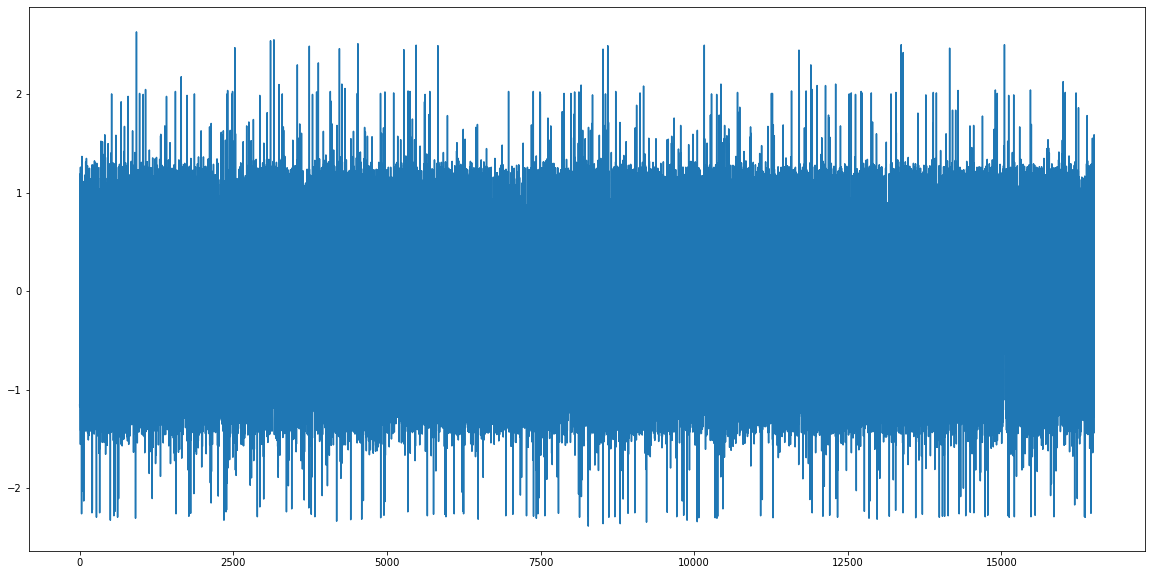

In [161]:
g.longitude.plot(figsize=(20, 10)) #스케일러를 통해 평균을 0에 둬서 좌우의 방향성이 비슷하다.

## ocean_proximity에 대한 처리

In [162]:
housing_num_tr.mean()

-1.9225479402820057e-16

In [163]:
housing_num_tr.std()

0.9999999999999999

In [181]:
housing[['ocean_proximity']]

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
...,...
6003,INLAND
7364,<1H OCEAN
6563,INLAND
12053,INLAND


In [182]:
housing_cat = housing[['ocean_proximity']].copy

In [183]:
housing_cat

<bound method NDFrame.copy of       ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
...               ...
6003           INLAND
7364        <1H OCEAN
6563           INLAND
12053          INLAND
13908          INLAND

[16510 rows x 1 columns]>

In [202]:
cat_encoder = OneHotEncoder(sparse=False)

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [203]:
#범주형 특성 전처리  더미처럼 만든 것.
cat_pipeline = Pipeline([
        ('cat', OneHotEncoder(sparse=False)) #sparse가 True면 generator처럼 희소한 데이터에 대해 보여주지 않는다 허나 False면 굳이 안보여줘도 되지만 보여준다..!
    ])

In [213]:
#범주형 특성 전처리  더미처럼 만든 것.
ca = Pipeline([
        ('cat', OneHotEncoder(sparse=True)) #sparse가 True면 generator처럼 희소한 데이터에 대해 보여주지 않는다 허나 False면 굳이 안보여줘도 되지만 보여준다..!
    ])

In [216]:
ca = ca.fit_transform(housing_cat)

In [217]:
ca.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [204]:
housing_cat_tr = cat_pipeline.fit_transform(housing_cat)

In [205]:
housing_cat_tr

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## 수치형 특성 전처리 cat_pipeline 과 범주형 특성 전처리 num_pipeline 을 만들었다.

In [218]:
from sklearn.compose import ColumnTransformer #컬럼별 변환을 해준다.

In [220]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [221]:
num_attribs = list(housing_num.columns)
cat_attribs = ['ocean_proximity']

In [222]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [223]:
cat_attribs

['ocean_proximity']

In [230]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs), #아까는 이름, 변환기 하나씩인데 이제 이름에 여러 변환기를 넣었다. 사실 변환기 조차도 파이프 라인이다.
    #('cat', cat_pipeline, cat_attribs)
    #('cat', 'drop', cat_attribs) #특성을 삭제하고 싶으면 drop이라고 적힌 것을 보고 cat_attribs를 삭제한다.
    ('loc', 'passthrough', cat_attribs) #특성을 삭제가 아니라 무시하고싶으면 패스스루 #이렇게 되면 다른 걸 집어넣는다고 해도 무시한다.
    ])

## 범주 데이터는 애초에 하나만 들어간 파이프 라인이라서 pipeline없이 개별 변환기로 넣어도 됨
## full_pipeline = ColumnTransformer([
##    ('num', num_pipeline, num_attribs),
##    ('cat', OneHotEncoder, cat_attribs) #범주형이 원래부터 1개여서 따로 파이프라인 안만들고 결합해도 된다.
##    ])

In [226]:
housing_prepared = full_pipeline.fit_transform(housing)

In [229]:
housing_prepared.shape

(16510, 16)

10(9개의 특성, 1이 레이블)

레이블을 제외한 9 -> 16이 되었다.

+3 특성 결합, +4 ocean이 1개에서 5개로 4개가 추가되었다.

고로 16개가 되었다.

In [ ]:
데이터 준비작업 80%, 모델선택+검증+튜닝 20%

In [ ]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder, cat_attribs) #범주형이 원래부터 1개여서 따로 파이프라인 안만들고 결합해도 된다.
    ])

In [ ]:
strat_train_data  = 결측치 처리하고, 컬럼 추가하고, 원핫 인코딩과 표준화를 해서 학습을 한다.
start_test_data 역시 결측치, 컬럼, 원한인코딩, 표준화를 한 다음 예측해야한다.

이미 train과 test가 나뉜 경우에 train기준으로 fit을 해야하므로 test는 fit은 안하고 transform만 하면 된다.